In [1]:
import os
import glob
import shutil
import pydicom
import numpy as np

from tqdm import tqdm
from skimage import io
from matplotlib import pyplot as plt
from matplotlib import cm

from utils.utils import read_csv, create_csv

## Convert .fcsv files to .csv files for training

In [34]:
#files = glob.glob(r'C:\Users\deschweiler\Documents\KneeMRI_PatellofemoralMeasurements\data\ChestX-ray14\no_finding=1_followup_num=0_view_position=PA\*\*\*.fcsv')
files = glob.glob(r'D:\annotations_raw\ChestX-ray14_Nikol\*\*\*.fcsv')
save_path = r'D:\data\ChestX-ray14_fullsize\preprocessed'

manual_ordering = [1,2,3,4,5,6,7,8,9,10,\
                   11,12,13,14,32,31,30,29,28,27,\
                   26,25,24,23,22,21,20,19,18,17,\
                   16,15,33,34,35,36,37,38,39,40,\
                   41,42,43,44,45,46,47,48,49,50,\
                   51,52,53,54,55,56,57,58,59,60,\
                   61,62,63,64,65,66,67,68,69,70,\
                   71,72,73,74,75,76,77,78,79,80,\
                   81]

for num_file, file in tqdm(enumerate(files), total=len(files)):

    data = read_csv(file)
    landmarks = []
    labels = []
    for d in data[3:]:
        data_string = d[0].split(',')
        pos = [int(float(data_string[1])), int(float(data_string[2]))]
        landmarks.append(pos)
        labels.append(data_string[11])

    landmarks = [l for l,_ in sorted(zip(landmarks, manual_ordering), key=lambda x: x[1])]
    
    file_info = file.split(os.sep)
    save_name = os.path.split(file)[-1].replace('.fcsv', '_landmarks')
    save_dir = os.path.join(save_path, file_info[3].replace('_first10',''), 'landmarks_Nikol', save_name)

    create_csv(landmarks, save_dir, test_split=0, val_split=0)    

100%|██████████| 20/20 [00:01<00:00, 16.95it/s]


# Extract PNGs from DICOM Images

In [16]:
import glob
import os
import pydicom
import numpy as np
from PIL import Image

data_root = r'C:\Users\DEschweiler\Documents\data\knee_XRays_2010-2024\data'
save_path = os.path.join(data_root, 'all_images')
os.makedirs(save_path, exist_ok=True)

# # Remove existing PNG files in the target directories
# png_files = glob.glob(os.path.join(data_root, '*', '*.png'))
# del_count = 0
# for png_file in png_files:
#     try:
#         os.remove(png_file)
#         del_count += 1
#     except FileNotFoundError:
#         print(f"File not found: {png_file}")
#     except Exception as e:
#         print(f"Error removing file {png_file}: {e}")
# print(f"Deleted {del_count} existing PNG files.")

# Process DICOM files and save as PNG
dcm_files = []
# Use UNC paths to handle Windows path length limitations
unc_data_root = r'\\?\C:\Users\DEschweiler\Documents\data\knee_XRays_2010-2024\data'
for root, dirs, files in os.walk(unc_data_root):
        for file in files:
            if file.lower().endswith('.dcm'):
                file_path = os.path.join(root, file)
                # Convert back to normal path for further processing
                normal_path = file_path.replace('\\\\?\\', '')
                dcm_files.append(normal_path)

saved_count = 0
for num_file, dicom_file in enumerate(dcm_files):

    info = dicom_file.replace(data_root, '').split(os.path.sep)

    folder = info[1]
    label = info[-2]
    file_name = f'{folder}_{label}_{info[-1].replace(".dcm", ".jpg")}'

    try:
        dicom_data = pydicom.dcmread(r'\\?\{0}'.format(dicom_file))
    except (pydicom.errors.InvalidDicomError,FileNotFoundError):
        print(f"Invalid DICOM file: {dicom_file}")
        continue
    try:
        dicom_image = dicom_data.pixel_array.astype(np.float32)
        dicom_image -= np.min(dicom_image)
        dicom_image /= np.max(dicom_image)
        dicom_image *= 255.0
        dicom_image = dicom_image.astype(np.uint8)
        dicom_image = Image.fromarray(dicom_image)
        dicom_image.save(os.path.join(save_path, file_name))
        print(f'Saved {file_name} ({num_file+1}/{len(dcm_files)})')
        saved_count += 1
    except Exception as e:
        print(f"Error processing {dicom_file}: {e}")
        continue
print(f"Saved {saved_count} PNG files from DICOM files.")

Saved 9041372515_CR Lateral_CR000000.jpg (1/22)
Saved 9048179301_CR AP_CR000000.jpg (2/22)
Saved 9048179301_CR Lateral_CR000000.jpg (3/22)
Invalid DICOM file: C:\Users\DEschweiler\Documents\data\knee_XRays_2010-2024\data\9051359002\8d8195acec164da5bd3cb364c7774ccc Anonymous_76959ab74ca83f96620a19bc9d18d1c1073839be2291cc3fa4ed88b31b86235f\76959ab74ca83f96620a19bc9d18d1c1073839be2291cc3fa4ed88b31b86235f Knie\CR AP\CR000000.dcm
Saved 9051359002_CR Lateral_CR000000.jpg (5/22)
Saved 9051362801_CR AP_CR000000.jpg (6/22)
Saved 9051362801_CR Lateral_CR000000.jpg (7/22)
Saved 9051362801_CR Tunnel Frik_CR000000.jpg (8/22)
Saved 9084871202_CR AP_CR000000.jpg (9/22)
Saved 9084871202_CR Lateral_CR000000.jpg (10/22)
Saved 9097801601_CR AP_CR000000.jpg (11/22)
Saved 9097801601_CR Lateral_CR000000.jpg (12/22)
Saved 9116760601_CR AP_CR000000.jpg (13/22)
Saved 9116760601_CR Lateral_CR000000.jpg (14/22)
Saved 9140719802_CR AP_CR000000.jpg (15/22)
Saved 9140719802_CR Lateral_CR000000.jpg (16/22)
Saved 908

In [20]:
dcm_files

['C:\\Users\\DEschweiler\\Documents\\data\\knee_XRays_2010-2024\\data\\9041372515\\72dfc61d6b8648c485591cb609bf67ac Anonymous_f66e9e773717f9140edc817a235141c83ebc2e80c1ec90e5bcf833057ab935bc\\f66e9e773717f9140edc817a235141c83ebc2e80c1ec90e5bcf833057ab935bc Knie\\CR Lateral\\CR000000.dcm',
 'C:\\Users\\DEschweiler\\Documents\\data\\knee_XRays_2010-2024\\data\\9048179301\\2071883d7f1c44068af19fce81cc8f83 Anonymous_c93898b8d06ffffca3ef0f50cfad6e45ff4c0c3d25c946d3fb597094e0b96012\\c93898b8d06ffffca3ef0f50cfad6e45ff4c0c3d25c946d3fb597094e0b96012 Knie\\CR AP\\CR000000.dcm',
 'C:\\Users\\DEschweiler\\Documents\\data\\knee_XRays_2010-2024\\data\\9048179301\\2071883d7f1c44068af19fce81cc8f83 Anonymous_c93898b8d06ffffca3ef0f50cfad6e45ff4c0c3d25c946d3fb597094e0b96012\\c93898b8d06ffffca3ef0f50cfad6e45ff4c0c3d25c946d3fb597094e0b96012 Knie\\CR Lateral\\CR000000.dcm',
 'C:\\Users\\DEschweiler\\Documents\\data\\knee_XRays_2010-2024\\data\\9051359002\\8d8195acec164da5bd3cb364c7774ccc Anonymous_76959ab74

## Create a list of all files

In [15]:
annotated_image_files = glob.glob(r'C:\Users\deschweiler\Documents\KneeMRI_PatellofemoralMeasurements\data\ChestX-ray14\no_finding=1_followup_num=0_view_position=PA\*_first10\*.png')
annotated_image_files = [[f.replace(r'C:\Users\deschweiler\Documents\KneeMRI_PatellofemoralMeasurements\data\Chest','Chest'),] for f in annotated_image_files]
create_csv(annotated_image_files, r'C:\Users\deschweiler\Documents\KneeMRI_PatellofemoralMeasurements\data\filelists\ChestX14_PA_AleksandarAnnot', test_split=0, val_split=0)

NameError: name 'create_csv' is not defined

In [ ]:
list_files = glob.glob(r'C:\Users\deschweiler\Documents\KneeMRI_PatellofemoralMeasurements\data\ChestX-ray14\no_finding=1_followup_num=0_view_position=PA\*_first10\*\landmarks.csv')
for list_file in list_files:
    identifier = list_file.split('\\')[-2]
    save_name = os.path.join(os.path.split(list_file)[0], identifier+'_landmarks.csv')
    os.rename(list_file, save_name)

In [ ]:
list_files = glob.glob(r'C:\Users\deschweiler\Documents\KneeMRI_PatellofemoralMeasurements\data\ChestX-ray14\no_finding=1_followup_num=0_view_position=PA\*_first10\*\*landmarks.csv')
for list_file in list_files:
    save_path = os.path.join(list_file.split('_first10')[0], 'landmarks')
    os.makedirs(save_path, exist_ok=True)
    shutil.copy2(list_file, save_path)

In [ ]:
list_files = glob.glob(r'C:\Users\deschweiler\Documents\KneeMRI_PatellofemoralMeasurements\data\ChestX-ray14\no_finding=1_followup_num=0_view_position=PA\*\*\*landmarks.csv')
list_files = [f for f in list_files if not 'first10' in f]
for list_file in list_files:
    coords = read_csv(list_file)
    coords = [[int(c[1]), int(c[0])] for c in coords]
    create_csv(coords, list_file[:-4], val_split=0, test_split=0)

## Save Eneko annotations

In [ ]:
import glob
import os
from tqdm import tqdm
from utils.utils import read_csv, create_csv

annotation_list = glob.glob(r'E:\data\UKAHipX\REFERENCE\*\landmarks.csv')
save_dir = None
i = 0
for annot_file in tqdm(annotation_list):

    # Read data
    data = read_csv(annot_file)
    data = [d[0].split(',') for d in data[1:]] # split into individual numbers

    # Sort list by label number
    data = sorted(data, key=lambda x:int(x[0].replace('F-','')))

    # Extract coordinates
    coords = [[int(float(d[1])), int(float(d[2]))] for d in data] # extract x/y coordinates

    # Determine location for saving
    file_root, file_name = os.path.split(annot_file)
    save_name = file_root.split(os.sep)[-1]+'_landmarks'

    if save_dir is None:
        save_root = file_root
    else: save_root = save_dir

    # Save file
    create_csv(coords, os.path.join(save_root, save_name), test_split=0, val_split=0)
    i += 1

print(f'Processed {i} files')


100%|██████████| 7/7 [00:00<00:00, 103.64it/s]

Processed 7 files


## Rename files to match the folder ID

In [ ]:
data_root = r'E:\data\UKAHipX'
# folders = ['AXIAL_EXTRA_LEFT', 'AXIAL_EXTRA_RIGHT', 'AXIAL_LEFT', 'AXIAL_RIGHT',\
#            'LATERAL_EXTRA_LEFT', 'LATERAL_EXTRA_RIGHT', 'LATERAL_LEFT', 'LATERAL_RIGHT',\
#            'AP_EXTRA_LEFT', 'AP_EXTRA_RIGHT', 'AP_LEFT', 'AP_RIGHT', 'Y_LEFT', 'Y_RIGHT']
folders = ['REFERENCE',]

for folder in folders:
    data_path = os.path.join(data_root, folder)
    image_files = glob.glob(os.path.join(data_path, '*', '*.jpg'))
    keypoint_files = glob.glob(os.path.join(data_path, '*', '*_landmarks.csv'))
    for image_file, keypoint_file in zip(image_files, keypoint_files):
        id = os.path.split(image_file)[0].split(os.sep)[-1]
        image_file_new = os.path.join(data_path, id, id+'_'+folder+'_image.jpg')
        keypoint_file_new = os.path.join(data_path, id, id+'_'+folder+'_landmarks.csv')
        os.rename(image_file,  image_file_new)
        os.rename(keypoint_file, keypoint_file_new)

In [ ]:
import os
import glob

data_root = r'E:\data\UKAHipX'
folders = ['TARGET_IMAGES',]
for folder in folders:
    data_path = os.path.join(data_root, folder)
    image_files = glob.glob(os.path.join(data_path, '*', '*.jpg'))
    for image_file in image_files:
        id = os.path.split(image_file)[0].split(os.sep)[-1]
        image_file_new = os.path.join(data_path, id, id+'_'+folder+'_image.jpg')
        os.rename(image_file,  image_file_new)

## Flip image axis and landmark positions along a certain axis

In [ ]:
import glob
import os
ids = [f.split(os.path.sep)[-1] for f in glob.glob(r'E:\data\UKAKneeX\LATERAL_ALL\*')]
print(ids)

['1000000000392774_9192333801', '1000000000479951_9190938402', '1000000001265252_9191784601', '1000000001272533_7102029302', '1000000001355277_9190471701', '1000000001382580_9190093202', '1000000001387502_7102098401', '1000000001440626_9190355301', '1000000001486874_9192306001', '1000300000026827_9191074502', '1000300000084820_7102118902', '1000300000118862_9191875601', '1010500000008018_9190527602', '1010500000013809_9191409401', '1010500000022271_9192458801', '1010500000025658_9191385303', '1010500000136604_9191848901', '1010500000605530_9189741102', '1010500000623849_9192116901', '1010500000668905_9191859801', '1010500000718410_9190787601', '1010500001067055_9189978101', '1010500001072977_9191430601', '1010500001075501_9192217903', '1010500001107242_9189896301', '1010500001112862_9190145101', '1010500001120580_9192078909', '1010500001261466_9190106701', '1010500001268148_9191182602', '1010500001343349_9189788601', '1010500001368214_9190530601', '1010500001419874_9190488101', '101050

In [ ]:
# ids = ['1010500001846541_7102144602']
axis = 0 # 0 or 1

data_path = r'E:\data\UKAKneeX\LATERAL_ALL\*'

img_files = sorted(glob.glob(os.path.join(data_path, '*.jpg')))
if not ids is None:
    img_files = [f for f in img_files if any([os.path.split(f)[-1].startswith(id+'_') for id in ids])]
kpt_files = sorted(glob.glob(os.path.join(data_path, '*_landmarks.csv')))
if not ids is None:
    kpt_files = [f for f in kpt_files if any([os.path.split(f)[-1].startswith(id+'_') for id in ids])]

for img_file, kpt_file in zip(img_files, kpt_files):

    # Read data
    img = io.imread(img_file)
    landmarks = read_csv(kpt_file)

    # Flip axes
    if not axis is None:

        img_dim = img.shape
        img = np.flip(img, axis=1-axis)

        for i in range(len(landmarks)):
            landmarks[i][axis] = str(img_dim[1-axis] - int(landmarks[i][axis]))

    

    # Save data
    io.imsave(img_file, img)
    create_csv(landmarks, kpt_file.replace('.csv',''), test_split=0, val_split=0)

## Scale landmarks

In [ ]:
#data_path = r'D:\data\ChestX-ray14_fullsize\preprocessed\*\landmarks_Alex_corrected_Eneko'
#files = glob.glob(os.path.join(data_path, '*_landmarks.csv'))

ids = ['126', '130']
data_path = r'D:\data\UKAKneeX\LATERAL_LEFT\n\*'
files = glob.glob(os.path.join(data_path, '*_landmarks.csv'))
files = [f for f in files if any([os.path.sep+id+'_landmarks' in f for id in ids])]


for file in files:
    landmarks = read_csv(file)
    for i in range(len(landmarks)):
        landmarks[i] = [int(float(landmarks[i][0])*(1/0.35278)),int(float(landmarks[i][1])*(1/0.35278))]
    create_csv(landmarks, file.replace('.csv',''), test_split=0, val_split=0)


In [ ]:
data_path = r'D:\data\ChestX-ray14_fullsize\preprocessed\*\landmarks_Alex_corrected_Eneko'
files = sorted(glob.glob(os.path.join(data_path, '*_landmarks.csv')))

data_path_backup = r'D:\data\ChestX-ray14_fullsize\preprocessed_backup\*\landmarks_Alex_corrected_Eneko'
files_backup = sorted(glob.glob(os.path.join(data_path_backup, '*_landmarks.csv')))

for file, file_backup in zip(files, files_backup):

    assert os.path.split(file)[-1] == os.path.split(file_backup)[-1], "Error with file assignment"
    os.replace(file_backup, file)



## Visualize landmarks on image

In [ ]:
ids1 = [f for f in os.listdir(r'D:\data\UKAFeetX\AP_RIGHT') if os.path.isdir(os.path.join(r'D:\data\UKAFeetX\AP_RIGHT', f))]
ids2 = [f for f in os.listdir(r'C:\Users\DEschweiler\Downloads\FINAL_FEET_AP\AP\RIGHT') if os.path.isdir(os.path.join(r'C:\Users\DEschweiler\Downloads\FINAL_FEET_AP\AP\RIGHT', f))]
sorted(list(set(ids1) - set(ids2)))


['1010500000646872_0000323254',
 '1010500000718407_9191506101',
 '1010500001371177_9190638602',
 '1010500001669669_9191724003',
 '1010500001867873_9190221001',
 '1010500001874763_9192097701']

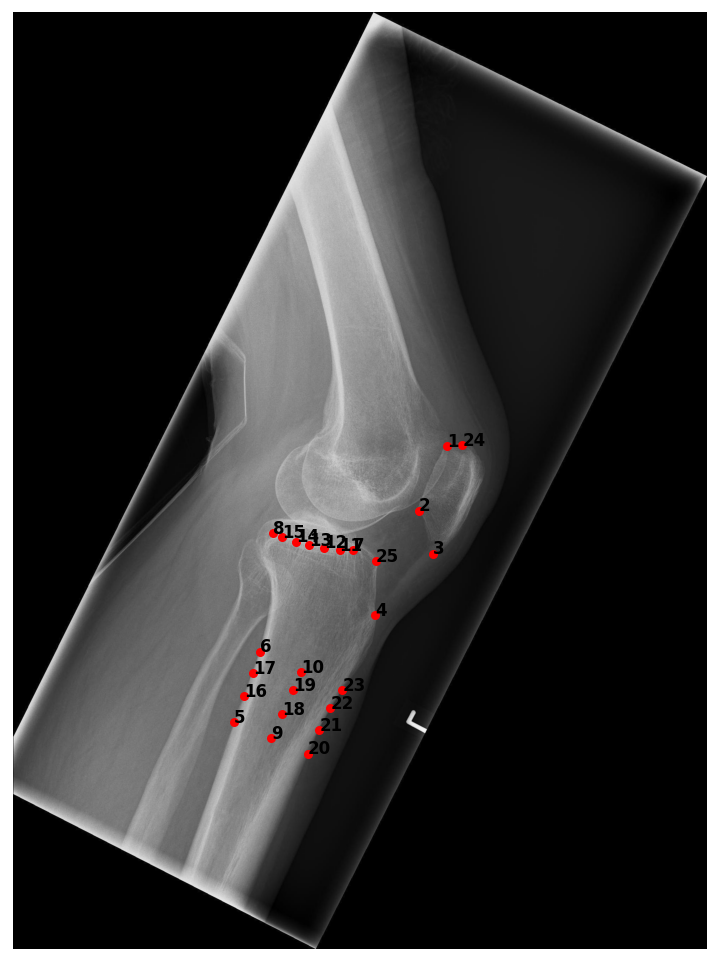

In [ ]:
#image_path = r'D:\data\UKAShoulderX\AP_RIGHT\1000000001011775_0000406014\1000000001011775_0000406014_image.jpg'
#landmark_path = r'D:\data\UKAShoulderX\AP_RIGHT\1000000001011775_0000406014\1000000001011775_0000406014_landmarks.csv'
landmark_path2 = None#r'D:\experiments\MSK_Landmarks_2D\ROMA_Feet_APRight\1010500001886349_0000319687_to_1000000001200985_7102122401_matches.csv'

image_path = r'E:\data\UKAKneeX\LATERAL_LEFT\1000000001355277_9190471701\1000000001355277_9190471701_LATERAL_LEFT_image.jpg'
landmark_path = r'E:\data\UKAKneeX\LATERAL_LEFT\1000000001355277_9190471701\1000000001355277_9190471701_LATERAL_LEFT_landmarks.csv'

def plot_image(image, kpts1, kpts2, labels=None, sizes=None, alpha=0.5):

    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    plt.imshow(image, cmap='gray')
        
    # Draw landmarks
    ax.scatter(kpts1[:, 1], kpts1[:, 0], c='red', s=sizes, alpha=alpha) #, edgecolor='red', linewidth=2.5

    if not kpts2 is None:
        ax.scatter(kpts2[:, 1], kpts2[:, 0], c='blue', s=sizes, alpha=alpha)

    # Draw labels
    if not labels is None:
        for landmark, label in zip(kpts1, labels):
            plt.text(landmark[1], landmark[0], label, fontsize=12, fontweight='bold')

    plt.xlim([-10, image.shape[1]+10])
    plt.ylim([image.shape[0]+10, -10])
    plt.tight_layout()
    plt.axis('off')

image = io.imread(image_path)

landmarks = read_csv(landmark_path)
for i in range(len(landmarks)):
    landmarks[i] = [int(landmarks[i][1]),int(landmarks[i][0])]
landmarks = np.array(landmarks)

if not landmark_path2 is None:
    landmarks2 = read_csv(landmark_path2)
    for i in range(len(landmarks2)):
        landmarks2[i] = [int(landmarks2[i][1]),int(landmarks2[i][0])]
    landmarks2 = np.array(landmarks2)
else:
    landmarks2 = None

labels = np.arange(1, len(landmarks)+1)
plot_image(image, landmarks, landmarks2, labels=labels, sizes=30, alpha=1.0)

## Visualize Measurements on Image

Available measurements:
#0 Hallux Valgus Angle
#1 First-Second Intermetatarsal Angle
#2 First-Fifth Intermetatarsal Angle
#3 Hallux Valgus Angle (robust)
#4 First-Second Intermetatarsal Angle (robust)
#5 First-Fifth Intermetatarsal Angle (robust)


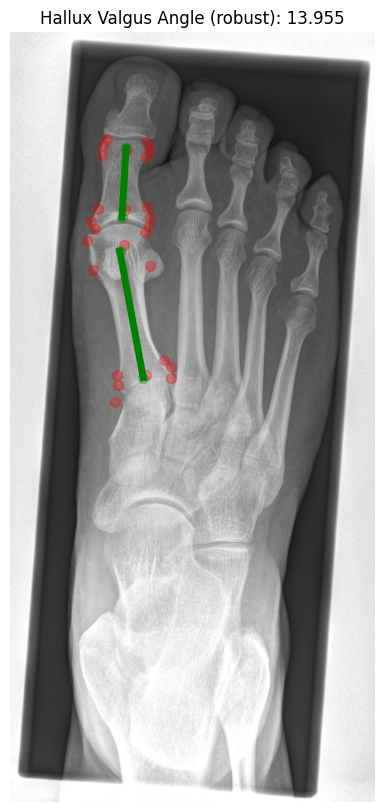

In [ ]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from utils.utils import read_csv, load_config
from measurements.measurements import get_function_dict, plot_image

# Load config and measure functions
config_tag = 'feet_ap_right'
config = load_config(config_tag, config_path=r'C:\Users\deschweiler\Documents\KneeMRI_PatellofemoralMeasurements\roma_medical\experiment_config_windows.json')
function_dict, kpt_names = get_function_dict(mode=config['mode'])
function_names = [key for key in function_dict.keys()]

# Get data
id = '1010500001258406_0000550088'
img_folder = 'AP_RIGHT'
anatomy = 'Feet'
laterality = 'APRight'
exp_folder = 'ROMA_{0}_{1}'.format(anatomy, laterality)
reference_image = io.imread(r'E:\data\UKA{2}X\{0}\{1}\{1}_{0}_image.jpg'.format(img_folder, id, anatomy))
reference_landmarks = read_csv(r'E:\experiments\MSK_Landmarks_2D\{0}\{1}_to_{2}_{3}_matches.csv'.format(exp_folder, config['reference_ids'][0], id, img_folder))
reference_landmarks = np.array([[float(y)*config['landmark_scaling'][0],float(x)*config['landmark_scaling'][1]] for x,y in reference_landmarks])

print('Available measurements:')
print('\n'.join(f'#{i} {n}' for i,n in enumerate(function_names)))

measure_name = list(function_dict.keys())[3]
measure_value = function_dict[measure_name][0](reference_landmarks*config['mpp'])
measure_lines = function_dict[measure_name][1](reference_landmarks)

# Plot and save data
plot_image(reference_image, measure_lines, title=measure_name+f': {measure_value:.3f}')
plt.savefig(r'C:\Users\DEschweiler\Documents\Publications\EuropeanRadiology2024_MedicalLandmarkMatching\measurement_visulizations\{0}_{1}_{2}.svg'.format(id, measure_name, img_folder), dpi=300)

In [ ]:
config

{'mode': 'knee_axial',
 'mpp': 0.148,
 'experiment_root': 'E:\\experiments\\MSK_Landmarks_2D',
 'experiment_folders': ['ROMA_Knee_AxialRightExtra'],
 'annotation_paths': ['E:\\data\\UKAKneeX\\AXIAL_EXTRA_RIGHT\\*'],
 'image_paths': ['E:\\data\\UKAKneeX\\AXIAL_EXTRA_RIGHT\\*'],
 'landmark_scaling': [1, 1],
 'representative_image_file': 'E:\\data\\UKAKneeX\\AXIAL_EXTRA_RIGHT\\1010500001095031_9190566102\\1010500001095031_9190566102_AXIAL_EXTRA_RIGHT_image.jpg',
 'representative_landmark_file': 'E:\\data\\UKAKneeX\\AXIAL_EXTRA_RIGHT\\1010500001095031_9190566102\\1010500001095031_9190566102_AXIAL_EXTRA_RIGHT_landmarks.csv',
 'reference_ids': ['1010500001095031_9190566102_AXIAL_EXTRA_RIGHT']}

## Boxplots

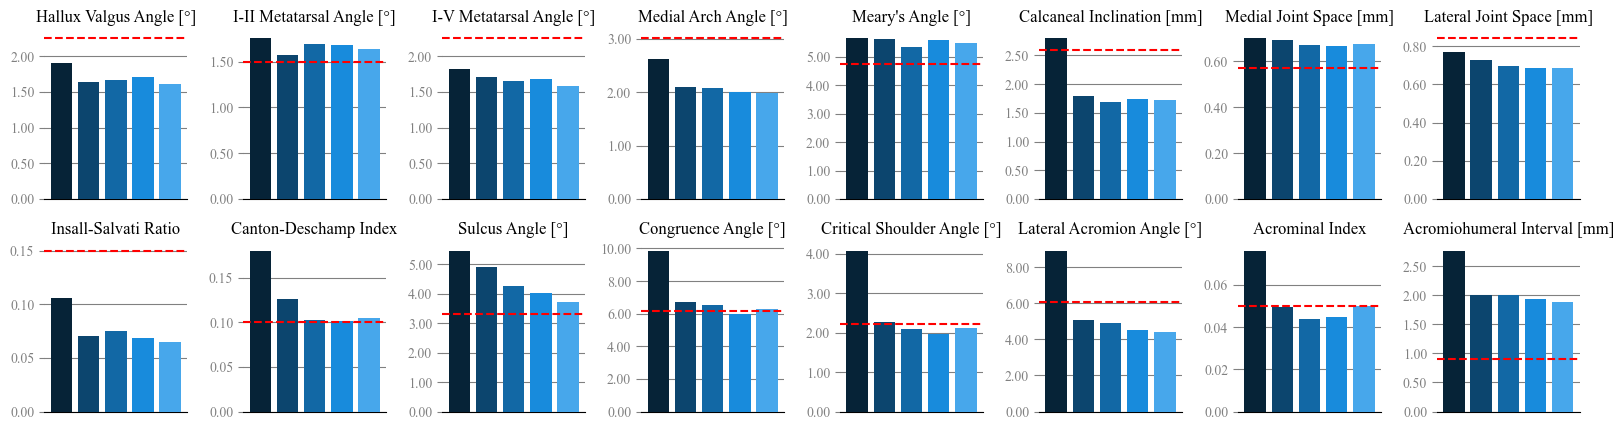

In [11]:
# Set Times New Roman as the default font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'dejavuserif'


# bulks = [1,5,10,20,40]
bulks = [1,2,3,4,5]
#color_values = np.linspace(1, 0, len(bulks))
#colors = [cm.Greens(0.9) for value in color_values]
# colors = ['#03101a',  # dunkleres fast-schwarz-blau
#  '#0b3450',  # kräftiges Dunkelblau
#  '#155c87',  # mittleres, sattes Blau
#  '#1f82bd',  # helleres, leuchtendes Blau
#  '#3ca8e6']  # sehr helles, kräftiges Blau
colors = ['#062337', '#0c456e', '#1268a5', '#188bdc', '#47a7eb']

mean_scores = [
    [1.9022, 1.6376, 1.6657, 1.7064, 1.6095],  # Hallux Valgus Angle
    [1.7532, 1.5681, 1.6925, 1.6804, 1.6382],  # First–Second Metatarsal Angle
    [1.8193, 1.7030, 1.6569, 1.6853, 1.5840],  # First–Fifth Metatarsal Angle
    [2.6327, 2.1055, 2.0792, 2.0063, 1.9934],  # Medial Arch Angle
    [5.6413, 5.6290, 5.3215, 5.6000, 5.4798],  # Talus-First Metatarsal Angle
    [2.7963, 1.7918, 1.6852, 1.7488, 1.7246],  # Calcaneal Inclination Angle
    [0.6989, 0.6914, 0.6701, 0.6649, 0.6731],  # Medial Joint Space
    [0.7701, 0.7281, 0.6977, 0.6838, 0.6876],  # Lateral Joint Space
    [0.1059, 0.0706, 0.0748, 0.0686, 0.0646],  # Insall Salvati Ratio
    [0.1799, 0.1256, 0.1027, 0.1010, 0.1049],  # Canton-Deschamp Index
    [5.4636, 4.9265, 4.2618, 4.0388, 3.7083],  # Sulcus Angle
    [9.8501, 6.7447, 6.5110, 5.9866, 6.2635],  # Congruence Angle
    [4.0781, 2.2746, 2.0922, 1.9689, 2.1279],  # Critical Shoulder Angle
    [8.9185, 5.0968, 4.9220, 4.5064, 4.3920], # Lateral Acromion Angle
    [0.0761, 0.0497, 0.0439, 0.0447, 0.0499],  # Acrominal Index
    [2.7667, 2.0098, 2.0012, 1.9378, 1.8851],  # Acromiohumeral Interval
]

labels = [
    'Hallux Valgus Angle',
    'I-II Metatarsal Angle',
    'I-V Metatarsal Angle',
    'Medial Arch Angle',
    'Meary\'s Angle',
    'Calcaneal Inclination',
    'Medial Joint Space',
    'Lateral Joint Space',
    'Insall-Salvati Ratio',  
    'Canton-Deschamp Index', 
    'Sulcus Angle',
    'Congruence Angle',
    'Critical Shoulder Angle',
    'Lateral Acromion Angle',
    'Acrominal Index',
    'Acromiohumeral Interval',
]

inter_rater = [
    2.25,  # Hallux Valgus Angle
    1.49,  # First–Second Metatarsal Angle
    2.25,  # First–Fifth Metatarsal Angle
    3.01,  # Medial Arch Angle
    4.73,  # Talus-First Metatarsal Angle
    2.59,  # Calcaneal Inclination Angle
    0.57,   # Medial Joint Space
    0.84,  # Lateral Joint Space
    0.15,  # Insall Salvati Ratio
    0.10,  # Canton-Deschamp Index
    3.31,  # Sulcus Angle
    6.18,  # Congruence Angle
    2.23,  # Critical Shoulder Angle
    6.10,  # Lateral Acromion Angle
    0.05,  # Acrominal Index
    0.90   # Acromiohumeral Interval
]


# Create a figure with subplots
ncols = 8
nrows = int(np.ceil(len(labels)/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 2.2 * nrows))

# Flatten axes array to easily loop over it
axes = axes.flatten()

for i in range(len(labels)):
    
    ax = axes[i]
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
    title_txt = labels[i]
    if 'Index' in labels[i] or 'Ratio' in labels[i]:
        # ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
        pass
    elif 'Angle' in labels[i]:
        # ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:.1f}^\circ$"))
        title_txt += ' [°]'
    else:
        # ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f} mm"))
        title_txt += ' [mm]'
    ax.set_title(title_txt, fontsize=12)

    # Remove the outer rim (spines)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xticks([])
    ax.tick_params(axis='y', colors='gray')

    if len(mean_scores[i])==0: continue
    ax.bar(bulks, mean_scores[i], label=labels[i], color=colors, zorder=3)
    ax.grid(axis='y', linestyle='-', zorder=0, color='gray')
    ax.axhline(y=inter_rater[i], color='red', linestyle='--', linewidth=1.5, zorder=4)


    plt.tight_layout()

plt.savefig(r'C:\Users\DEschweiler\Documents\Publications\2DMedicalLandmarkMatching\bulk\bulk_plot.svg')

Create corresponding legend

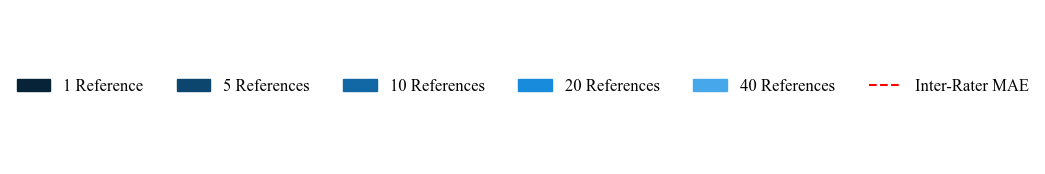

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Set Times New Roman as the default font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

# Create a figure
fig, ax = plt.subplots(figsize=(10, 2))

# Define the colors and labels for the legend
labels = ['1 Reference', '5 References', '10 References', '20 References', '40 References', 'Inter-Rater MAE']

# Create custom legend handles (colored squares)
handles = [mpatches.Rectangle((0, 0), 1, 1, color=color) for color in colors]
handles.append(mlines.Line2D([], [], color='red', linestyle='--', linewidth=1.5))

# Create the legend with custom handles and labels, set orientation to horizontal
plt.legend(handles=handles, labels=labels, loc='center', fontsize=12, frameon=False, ncol=6)

# Remove axes to focus on the legend
ax.axis('off')

# Save the plot
plt.savefig(r'C:\Users\DEschweiler\Documents\Publications\2DMedicalLandmarkMatching\bulk\bulk_legend.svg')

# MISC

In [ ]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt 

img_path = r'D:\data\UKAKneeX\AP_RIGHT\57\57_atlas.jpg'
img = io.imread(img_path)

max_thresh = 150
min_thresh = 100
label1 = np.logical_and(img[:,:,0]>max_thresh, img[:,:,1]<min_thresh, img[:,:,2]<min_thresh)
label2 = np.logical_and(img[:,:,0]<min_thresh, img[:,:,1]>max_thresh, img[:,:,2]<min_thresh)
label3 = np.logical_and(img[:,:,0]<min_thresh, img[:,:,1]<min_thresh, img[:,:,2]>max_thresh)

atlas = np.zeros(img.shape[:2])
atlas[label1] = 1
atlas[label2] = 2

plt.imshow(atlas, cmap='viridis')
io.imsave(img_path.replace('.jpg','.png'), atlas.astype(np.uint8))

FileNotFoundError: No such file: 'D:\data\UKAKneeX\AP_RIGHT\57\57_atlas.jpg'

#### nifti stuff

In [ ]:
import SimpleITK as sitk
import numpy as np
import nibabel as nib
import cv2
import tarfile

# Load image, convert to grayscale and add channel dimension
image = cv2.imread(r'D:\data\UKAFeetX\annotated_AP_Alex\AP_RIGHT\80\80_SER_0002 - Kopie.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = np.expand_dims(gray_image, axis=-1)

# Create NIfTI image
nifti_image = nib.Nifti1Image(gray_image, affine=np.eye(4))
nib.save(nifti_image, r'D:\data\UKAFeetX\annotated_AP_Alex\AP_RIGHT\80\80_SER_0002.nii')

# Compress to nii.tar.gz
with tarfile.open(r'D:\data\UKAFeetX\annotated_AP_Alex\AP_RIGHT\80\80_SER_0002.tar.gz', 'w:gz') as tar:
    tar.add(r'D:\data\UKAFeetX\annotated_AP_Alex\AP_RIGHT\80\80_SER_0002.nii', arcname=r'D:\data\UKAFeetX\annotated_AP_Alex\AP_RIGHT\80\80_SER_0002.nii')


Array Shape: (1656, 1012, 1)
Data Type: int64
Unique Values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


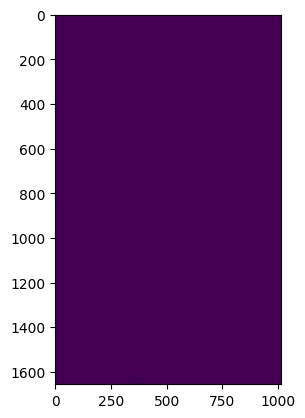

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label
from skimage import io

# Load the NIfTI file
nii_file = nib.load(r"D:\data\UKAFeetX\annotated_AP_Alex\AP_RIGHT\80\Lena_feet_segmentation.nii.gz")

# Get the image data as a NumPy array
segmentation_array = nii_file.get_fdata()

# Convert segmentation to instance segmentation with unique segment identifiers
instance_array = label(segmentation_array, connectivity=2)

# Print shape and data type
print("Array Shape:", instance_array.shape)
print("Data Type:", instance_array.dtype)
print("Unique Values:", np.unique(instance_array))

plt.imshow(instance_array[:,:,0]==7, cmap='viridis')
#io.imsave(r"D:\data\UKAFeetX\annotated_AP_Alex\AP_RIGHT\80\80_atlas.png", instance_array[:,:,0].astype(np.uint8))

In [ ]:
import glob
import os


folders = ['LATERAL_LEFT', 'LATERAL_RIGHT']

for folder in folders:
    kpt_files = glob.glob(r'E:\data\UKAFeetX\{0}\*\*_landmarks.csv'.format(folder))
    img_files = glob.glob(r'E:\data\UKAFeetX\{0}\*\*.jpg'.format(folder))

    for img_file, kpt_file in zip(img_files, kpt_files):

        # img_name = img_file.replace('_image.jpg','_'+folder+'_image.jpg')
        kpt_path, _ = os.path.split(kpt_file)
        kpt_name = os.path.join(kpt_path, 'landmarks.csv')

        # os.rename(img_file, img_name)
        os.rename(kpt_file, kpt_name)


In [ ]:
np.mean([1.82, 1.66, 1.68, 2.46, 3.47, 2.51, 1.92, 1.70, 4.36, 1.98, 2.32, 2.45])

male ratio 0.47
female ratio 0.53


In [ ]:
# Import svg file
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cairosvg
import io

# SVG in PNG umwandeln (im Speicher)
png_bytes = cairosvg.svg2png(url=r'C:\Users\DEschweiler\Documents\Publications\EuropeanRadiology2024_MedicalLandmarkMatching\measures_exploratory.svg')
img = mpimg.imread(io.BytesIO(png_bytes), format='png')

# Bild anzeigen
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')

# Als neue SVG speichern
plt.savefig("ausgabe.svg", format="svg")
plt.show()


OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.so.2'
cannot load library 'libcairo.2.dylib': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.2.dylib'
cannot load library 'libcairo-2.dll': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo-2.dll'

In [ ]:
# Move files from one directory to another
import os
import glob
import shutil
source_files = glob.glob(r'E:\data\UKAKneeX\LATERAL_PatellaMeasures\*\*_image.jpg')
for source_file in source_files:
    target_file = source_file.replace('LATERAL_PatellaMeasures', 'LATERAL_PACS')
    os.makedirs(os.path.split(target_file)[0], exist_ok=True)
    shutil.copy(source_file, target_file)
